In [1]:
# ============================
# Complete K-Means Clustering Guide
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score, 
    davies_bouldin_score, 
    calinski_harabasz_score, 
    adjusted_rand_score
)
from sklearn.preprocessing import StandardScaler



In [2]:

# ---------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------
df = pd.read_csv("clustering_practice_dataset.csv")
print(df.head())



   Feature1  Feature2  TrueCluster
0 -7.338988 -7.729954            2
1 -7.740041 -7.264665            2
2 -1.686653  7.793442            0
3  4.422198  3.071947            1
4 -8.917752 -7.888196            2


In [4]:
# Separate features
X = df[["Feature1", "Feature2"]].values
y_true = df["TrueCluster"].values   # Ground truth for evaluation

print(X)
print(y_true)

[[-7.33898809 -7.72995396]
 [-7.74004056 -7.26466514]
 [-1.68665271  7.79344248]
 [ 4.42219763  3.07194654]
 [-8.91775173 -7.8881959 ]
 [ 5.49753846  1.81323115]
 [-2.3360167   9.39960351]
 [ 5.05281029  1.40944513]
 [-2.98837186  8.82862715]
 [-3.70050112  9.67083974]
 [-3.11090424 10.86656431]
 [ 4.99689432  1.28026009]
 [-2.30033403  7.054616  ]
 [-3.92456837  8.59364081]
 [-7.53026976 -7.36723498]
 [-3.21125072  8.68662398]
 [-8.50716963 -6.83202465]
 [ 2.61473625  2.159624  ]
 [-2.41212007  9.98293112]
 [-1.92234053 11.20474175]
 [-1.35060204  8.19360381]
 [-2.67048333  9.41833699]
 [ 5.61499857  1.8261123 ]
 [-6.99195524 -7.10107919]
 [-2.97261532  8.54855637]
 [-6.34982301 -5.43854097]
 [-7.45639852 -6.12471837]
 [ 3.82165815  4.06555696]
 [ 4.62763206  1.07591531]
 [-3.39871205  8.19847584]
 [-3.49973395  8.4479884 ]
 [-3.58009012  9.49675854]
 [-6.04929137 -7.73619342]
 [-2.29510388  7.76854735]
 [-8.39481825 -5.51323533]
 [-2.28173769 10.32142888]
 [-6.12263857 -7.80227492]
 

In [5]:

# ---------------------------------------------------
# 2. Standardize Features (important for K-Means)
# ---------------------------------------------------
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-1.17252292e+00 -1.37037478e+00]
 [-1.25431875e+00 -1.30020394e+00]
 [-1.97125297e-02  9.70729957e-01]
 [ 1.22620543e+00  2.58674669e-01]
 [-1.49451639e+00 -1.39423947e+00]
 [ 1.44552434e+00  6.88460734e-02]
 [-1.52152220e-01  1.21295731e+00]
 [ 1.35482073e+00  7.95054866e-03]
 [-2.85201970e-01  1.12684758e+00]
 [-4.30442823e-01  1.25386282e+00]
 [-3.10192808e-01  1.43419168e+00]
 [ 1.34341650e+00 -1.15320250e-02]
 [-1.44874635e-01  8.59306522e-01]
 [-4.76141995e-01  1.09140897e+00]
 [-1.21153538e+00 -1.31567263e+00]
 [-3.30658767e-01  1.10543189e+00]
 [-1.41077697e+00 -1.23495683e+00]
 [ 8.57568372e-01  1.21086054e-01]
 [-1.67673727e-01  1.30092975e+00]
 [-6.77817519e-02  1.48519269e+00]
 [ 4.88259900e-02  1.03107884e+00]
 [-2.20367673e-01  1.21578253e+00]
 [ 1.46948068e+00  7.07886971e-02]
 [-1.10174455e+00 -1.27553331e+00]
 [-2.81988377e-01  1.08460972e+00]
 [-9.70779798e-01 -1.02480364e+00]
 [-1.19646912e+00 -1.12828700e+00]
 [ 1.10372364e+00  4.08522422e-01]
 [ 1.26810438e+00 -4

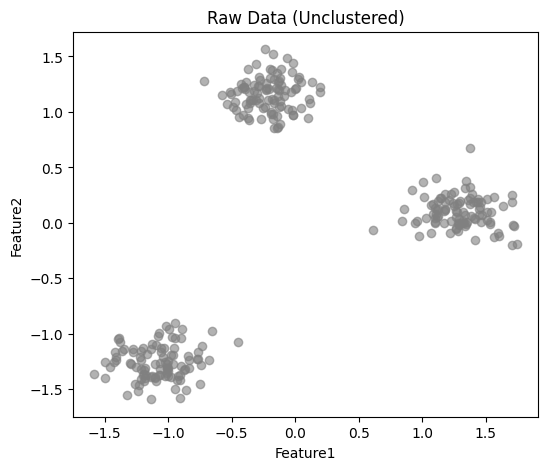

In [8]:

# ---------------------------------------------------
# 3. Visualize Raw Data
# ---------------------------------------------------
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c="gray", alpha=0.6)
plt.title("Raw Data (Unclustered)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()


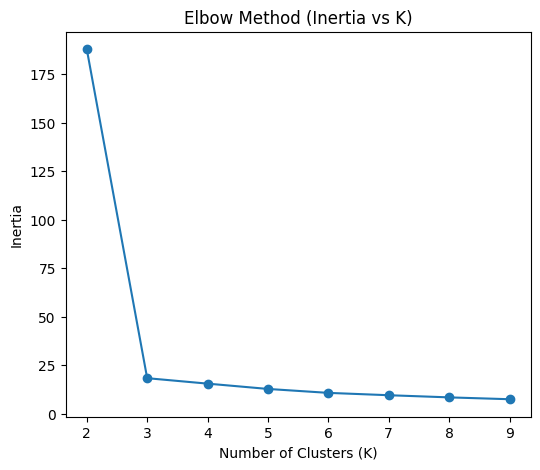

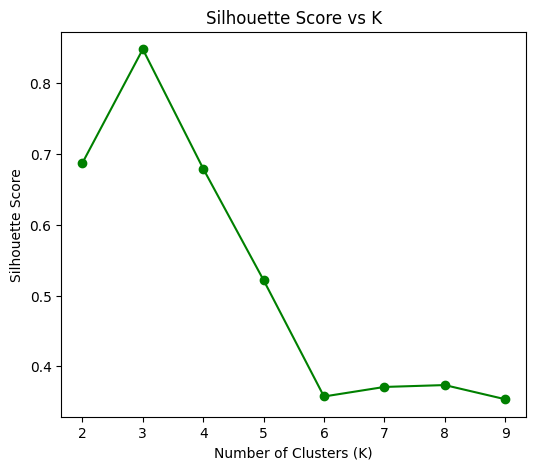

In [10]:

# ---------------------------------------------------
# 4. Find Optimal K (Elbow Method + Silhouette)
# ---------------------------------------------------
inertia = []
silhouette_scores = []

K_range = range(2, 10)  # try k = 2 to 9
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Elbow Plot
plt.figure(figsize=(6,5))
plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Silhouette Plot
plt.figure(figsize=(6,5))
plt.plot(K_range, silhouette_scores, marker="o", color="green")
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


In [12]:

# ---------------------------------------------------
# 5. Run Final K-Means (choose k=3 from elbow/silhouette)
# ---------------------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)
print(y_pred)


[1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]


In [13]:

# ---------------------------------------------------
# 6. Metrics for Evaluation
# ---------------------------------------------------
print("Evaluation Metrics for K-Means (k=3):")
print("Silhouette Score:", silhouette_score(X_scaled, y_pred))
print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, y_pred))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, y_pred))
print("Adjusted Rand Index (vs True Labels):", adjusted_rand_score(y_true, y_pred))


Evaluation Metrics for K-Means (k=3):
Silhouette Score: 0.8482330810203894
Davies-Bouldin Score: 0.21074868035209512
Calinski-Harabasz Score: 4730.173967940952
Adjusted Rand Index (vs True Labels): 1.0


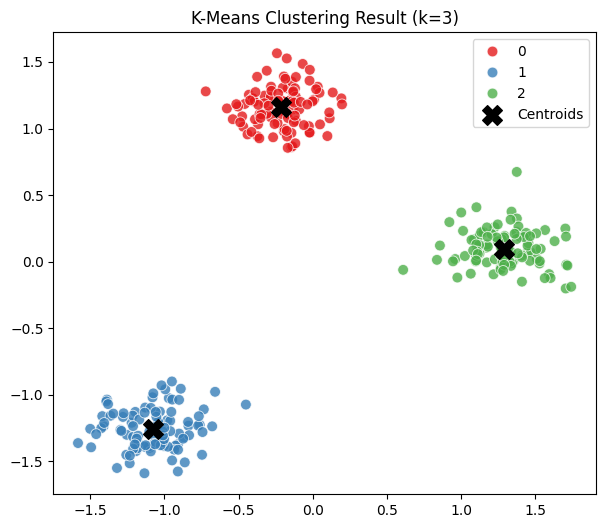

In [14]:

# ---------------------------------------------------
# 7. Visualize Final Clusters
# ---------------------------------------------------
plt.figure(figsize=(7,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_pred, palette="Set1", s=60, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c="black", marker="X", s=200, label="Centroids")
plt.title("K-Means Clustering Result (k=3)")
plt.legend()
plt.show()


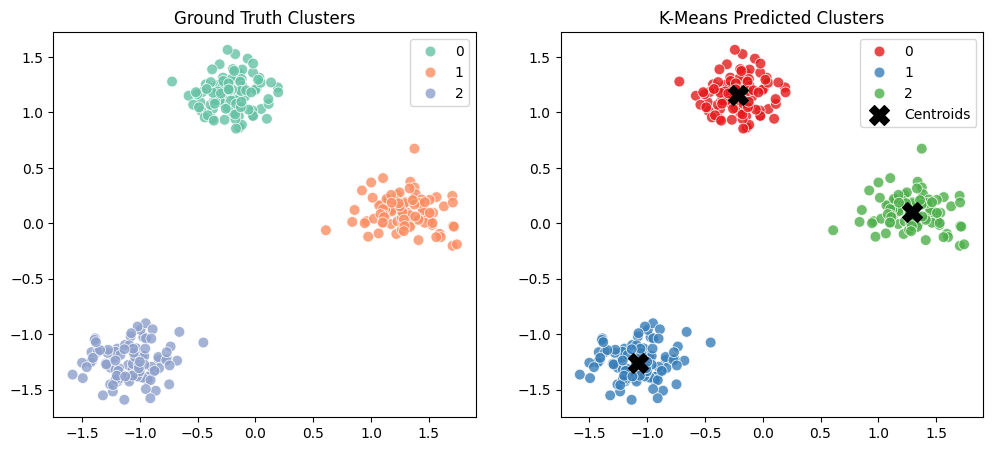

In [15]:

# ---------------------------------------------------
# 8. Extra: Compare Predicted vs True Clusters
# ---------------------------------------------------
plt.figure(figsize=(12,5))

# Ground Truth
plt.subplot(1,2,1)
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_true, palette="Set2", s=60, alpha=0.8)
plt.title("Ground Truth Clusters")

# Predicted
plt.subplot(1,2,2)
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_pred, palette="Set1", s=60, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c="black", marker="X", s=200, label="Centroids")
plt.title("K-Means Predicted Clusters")
plt.legend()

plt.show()